<a href="https://colab.research.google.com/github/Alok130802/Text-Classification/blob/master/BBC_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Librariers

In [0]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_curve,classification_report
import seaborn as sns
from sklearn.pipeline import Pipeline
import re
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from joblib import load,dump

# Load Dataset

In [0]:
data = pd.read_csv('bbc-text.csv')

In [3]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [0]:
list_category = data['category'].unique()
list_category = list_category.tolist()

# EDA on dataset 
 we can see that we have almost balanced class dataset 
 

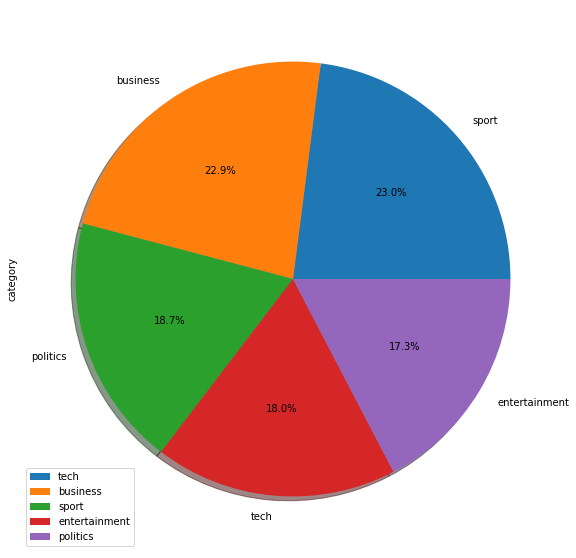

In [5]:
data["category"].value_counts().plot(kind = 'pie',figsize = (10, 10), autopct = '%1.1f%%', shadow = True)

plt.legend(list_category)
plt.show()

## Split to train and test 

In [0]:
train,test = train_test_split(data,random_state = 0,stratify = data['category'],test_size = 0.3)

In [7]:
print("Train data shape = {} ".format(train.shape))
print("Test data shape = {}".format(test.shape))

Train data shape = (1557, 2) 
Test data shape = (668, 2)


           category                                               text
383   entertainment  brando  rejected godfather role  late film sta...
307   entertainment  top gig award for scissor sisters new york ban...
1185           tech  rich pickings for hi-tech thieves viruses  tro...
667            tech  dvd copy protection strengthened dvds will be ...
1354       politics  tories attack burglar  u-turns  tory leader mi...


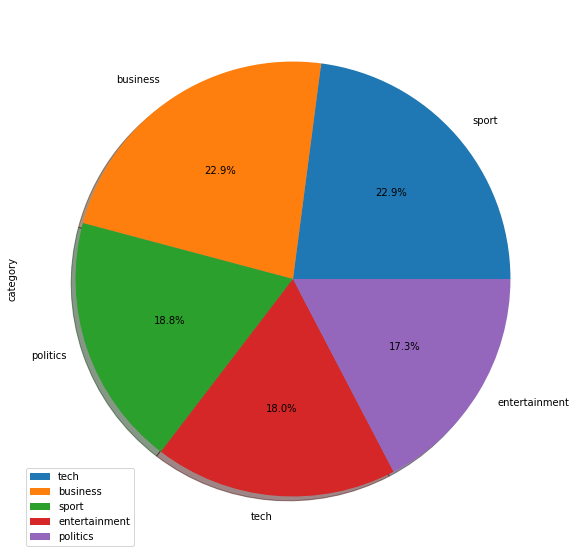

In [8]:
train["category"].value_counts().plot(kind = 'pie',figsize = (10, 10), autopct = '%1.1f%%', shadow = True)

plt.legend(list_category)
print(train.head())
plt.show()

           category                                               text
1452           tech  spam e-mails tempt net shoppers computer users...
1429       business  bt offers equal access to rivals bt has moved ...
111   entertainment  rapper jay-z becomes label boss rap star jay-z...
1232          sport  arsenal through on penalties arsenal win 4-2 o...
1939          sport  england claim dubai sevens glory england beat ...


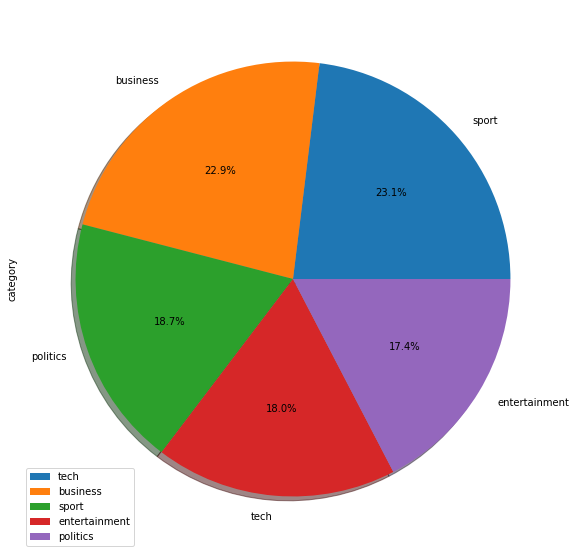

In [9]:
test["category"].value_counts().plot(kind = 'pie',figsize = (10, 10), autopct = '%1.1f%%', shadow = True)
print(test.head())
plt.legend(list_category)
plt.show()

This function is used to remove everything except alphacharacters and spaces


In [0]:
def preprocess(sms):
  pattern = re.compile('[^[A-Za-z\s]')
  sms = re.sub(pattern,' ',sms)
  sms = re.sub('\s+',' ',sms)
  sms = sms.lower()
  return sms

In [11]:
train['text'] = train['text'].map(lambda x :preprocess(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Use Label Encode to encode categories and use Tf-Idf to vactorize the text data

In [0]:
encoder = LabelEncoder()
vectorizer  = TfidfVectorizer()

train_x = vectorizer.fit_transform(train['text'])
train_y = encoder.fit_transform(train['category'])

Train model using grid search and 10 fold cross validation

In [13]:
param_grid = dict({"alpha":[1,10,100],
                   'fit_prior' :[True,False]})
grid = GridSearchCV(MultinomialNB(),param_grid,cv=10)
grid.fit(train_x,train_y)



GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 10, 100], 'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
def scoring_data(grid,data):
  x = vectorizer.transform(data['text'])
  y = encoder.transform(data['category'])
  score = grid.score(x,y)
  print("Accuracy of Model is {}".format(score))
  y_pred = grid.predict(x)
  confution_matrix = confusion_matrix(y_pred,y)
  print(classification_report(y,y_pred=y_pred))
  sns.heatmap(confution_matrix,annot=True,fmt='d',cmap = 'BuPu',xticklabels=list_category,yticklabels=list_category)

# Score of Model
we can see that we achieved 95% accuracy using MultinomialNB Model 

Accuracy of Model is 0.9520958083832335
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       153
           1       1.00      0.84      0.92       116
           2       0.93      0.98      0.96       125
           3       0.97      0.99      0.98       154
           4       0.91      0.97      0.94       120

    accuracy                           0.95       668
   macro avg       0.95      0.95      0.95       668
weighted avg       0.95      0.95      0.95       668



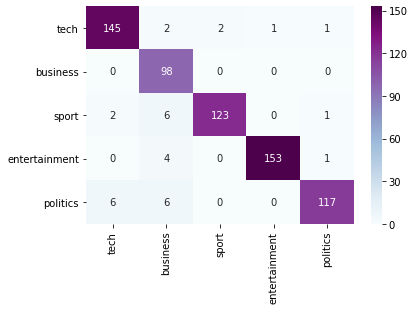

In [15]:
scoring_data(grid,test)

# k-NN Model

next we will try one more model to see how it behaves for which we are using K-NN model


In [16]:

knn_param_grid =dict({'n_neighbors':[1,10,11,12,13,14,15]})
knn_grid = GridSearchCV(KNeighborsClassifier(),cv = 10,param_grid=knn_param_grid) 
knn_grid.fit(train_x,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 10, 11, 12, 13, 14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_neighbors': 12}


Text(0.5, 1.0, '10 fold Cross validation result')

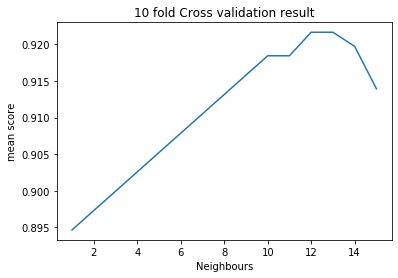

In [17]:
print(knn_grid.best_params_)
score = knn_grid.cv_results_
neighbours = knn_param_grid['n_neighbors']
mean_score = score['mean_test_score']
plt.plot(neighbours,mean_score)
plt.xlabel('Neighbours')
plt.ylabel('mean score')
plt.title("10 fold Cross validation result")

# Scoring
as we can see that we are getting less accuracy that MulticlassNavieBayes i.e only 92 %. Hence we will use Multiclass Naive-Bayes 

Accuracy of Model is 0.9281437125748503
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       153
           1       0.99      0.86      0.92       116
           2       0.82      0.97      0.89       125
           3       0.96      1.00      0.98       154
           4       0.92      0.95      0.93       120

    accuracy                           0.93       668
   macro avg       0.93      0.93      0.93       668
weighted avg       0.93      0.93      0.93       668



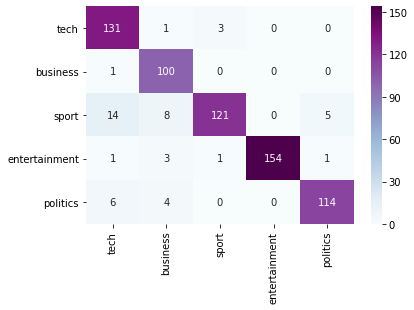

In [18]:
scoring_data(knn_grid,test)

# Export model 
Now we will export model using joblibs


In [0]:
file_model = dump(grid,'grid.joblib')
file_encoder = dump(encoder,'encoder.joblib')
file_preprocess = dump(preprocess,'preprocessing.joblib')
file_vectorizer = dump(vectorizer,'vectorizer.joblib')

In [0]:
cleaner = load('preprocessing.joblib')
tfidfvector = load('vectorizer.joblib') 
multiclassnaiveBayes = load('grid.joblib')
decoder = load('encoder.joblib')

# Test The model 

Input article here 


In [21]:
text = str(input("Enter the text : "))

text = cleaner(text)
text = tfidfvector.transform([text])
category = multiclassnaiveBayes.predict(text)
print(decoder.inverse_transform(category))



Enter the text : Mahindra & Mahindra Ltd. will re-designate Chairman Anand Mahindra as its non-executive chairman from April, as part of top-level changes announced under its succession plan.Managing Director Pawan Goenka will take on the role of chief executi...
['business']
